## Preprocesamiento de datos 

In [ ]:
#Importación de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

In [ ]:
#Creación del dataframe
df = pd.read_csv("panic_disorder_dataset_training.csv")

In [ ]:
#Eliminación del ID
df_noid = df.drop(["Participant ID"], axis=1)

In [ ]:
#Función para rellenar los nulos con valores random
def fill_missing_with_random_sample(column):
    non_null_values = column.dropna()  
    if not non_null_values.empty:
        return column.apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return column

In [ ]:
#Llenado de las nulos en las columnas correspondientes por medio de la función creada previamente
columns_to_fill = ["Medical History", "Psychiatric History", "Substance Use"]  
df_noid[columns_to_fill] = df_noid[columns_to_fill].apply(fill_missing_with_random_sample)

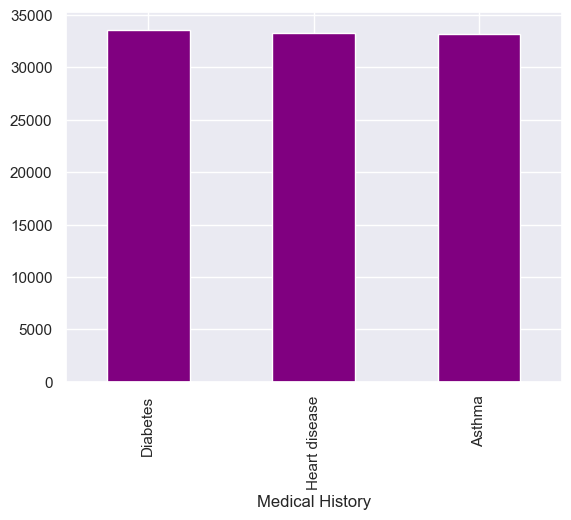

In [ ]:
#Visualización de los valores de Medical History
df_noid["Medical History"].value_counts().plot(kind = "bar", color = "Purple")
plt.show()

In [ ]:
#Creación de una lista que contiene los nombres de las columnas que volveremos dummies
dummies = ['Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors']

#Creamos una copia del dataset para volver dummie
df_f = df_noid.copy()
df_f = pd.get_dummies(df_f,dummies).astype(int)

In [ ]:
#Visualizamos el dataser para verificar que se aplicaron las dummies de manera correcta
df_f

,Age,Panic Disorder Diagnosis,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,38,0,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,51,0,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,32,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,64,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,31,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
99996,57,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
99997,20,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
99998,56,1,1,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
#Estandarizamos los datos de edad
scaler = StandardScaler()
df_f["Age"] = scaler.fit_transform(df_f[["Age"]])
df_f

,Age,Panic Disorder Diagnosis,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,-0.249604,0,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0.689761,0,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,-0.683157,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,1.629126,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,-0.755416,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.405745,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
99996,1.123314,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
99997,-1.550263,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
99998,1.051056,1,1,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
#Comprobamos el dataframe
type(df_f)

pandas.core.frame.DataFrame

## Entrenamiento del modelo

In [ ]:
"""Creamos las variables X y Y para el entrenamiento de modo que 
la bariable X son todos los valores menos nuestro target de 
Panic Disorder Diagnosis, y nuestra variable Y que es solo la columna de
Panic Disorder Diagnosis"""

X = df_f.drop(["Panic Disorder Diagnosis"],axis = 1)
Y = df_f["Panic Disorder Diagnosis"]


In [ ]:
#Visualizamos que nuestra variable X se haya creado de forma correcta
X


,Age,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,-0.249604,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
1,0.689761,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-0.683157,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,1.629126,1,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,-0.755416,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.405745,0,1,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
99996,1.123314,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
99997,-1.550263,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
99998,1.051056,1,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
#isualizamos que nuestra variable Y sea correcta
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Panic Disorder Diagnosis, Length: 100000, dtype: int32

In [ ]:
#Fragmentación de los datos
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42, stratify=Y, test_size  = 0.2)

In [15]:
x_train.shape

(80000, 41)

In [16]:
sum(y_train)/len(y_train)

0.04285

In [ ]:
#Entrenamiento del modelo con lo hiperparametros que se deben mandar por default
model = LogisticRegression(class_weight="balanced", solver="liblinear")

# Train the model
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]  

## Evaluación del Modelo

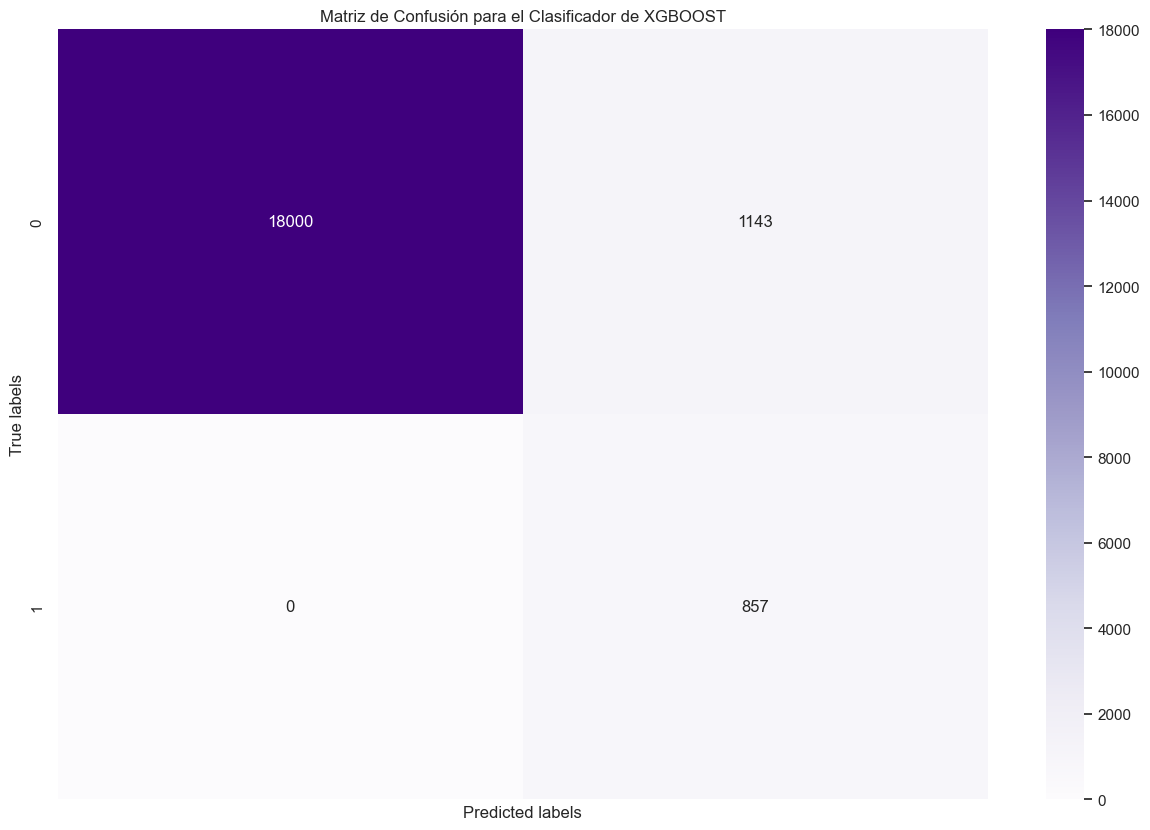

Precisión: (11644    0
3690     0
6230     0
73070    0
73021    0
        ..
60654    0
62556    0
13783    0
17702    0
52600    0
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int32, array([0, 0, 0, ..., 0, 1, 0]))
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19143
           1       0.43      1.00      0.60       857

    accuracy                           0.94     20000
   macro avg       0.71      0.97      0.78     20000
weighted avg       0.98      0.94      0.95     20000



In [18]:
cm_1 = confusion_matrix(y_test, y_pred)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Purples", xticklabels=0, yticklabels=1)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador de XGBOOST')
plt.show()
accuracy = (y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Precisión: {accuracy}")
print("Informe de clasificación:")
print(report)

Para ser el primer entrenamiento y tomando en cuenta la magnitud de datos pareciera que no son malos resultados, sin embargo si los comparamos con los resultados del XGBOOST no es un buen rendimiento tener 1143 falsos positivos contra los 184 del XGBOOSt

In [19]:
model.coef_[0].shape

(41,)

In [ ]:
#Imprimimos los valores de las columnas para facilitar la extracción de datos para el siguiente paso
X.columns

Index(['Age', 'Gender_Female', 'Gender_Male', 'Family History_No',
       'Family History_Yes', 'Personal History_No', 'Personal History_Yes',
       'Current Stressors_High', 'Current Stressors_Low',
       'Current Stressors_Moderate', 'Symptoms_Chest pain',
       'Symptoms_Dizziness', 'Symptoms_Fear of losing control',
       'Symptoms_Panic attacks', 'Symptoms_Shortness of breath',
       'Severity_Mild', 'Severity_Moderate', 'Severity_Severe',
       'Impact on Life_Mild', 'Impact on Life_Moderate',
       'Impact on Life_Significant', 'Demographics_Rural',
       'Demographics_Urban', 'Medical History_Asthma',
       'Medical History_Diabetes', 'Medical History_Heart disease',
       'Psychiatric History_Anxiety disorder',
       'Psychiatric History_Bipolar disorder',
       'Psychiatric History_Depressive disorder', 'Substance Use_Alcohol',
       'Substance Use_Drugs', 'Coping Mechanisms_Exercise',
       'Coping Mechanisms_Meditation', 'Coping Mechanisms_Seeking therapy',
  

In [ ]:
#Creamos un dataframe con la siguiente lista de columnas
data = ['Age', 'Gender_Female', 'Gender_Male', 'Family History_No',
       'Family History_Yes', 'Personal History_No', 'Personal History_Yes',
       'Current Stressors_High', 'Current Stressors_Low',
       'Current Stressors_Moderate', 'Symptoms_Chest pain',
       'Symptoms_Dizziness', 'Symptoms_Fear of losing control',
       'Symptoms_Panic attacks', 'Symptoms_Shortness of breath',
       'Severity_Mild', 'Severity_Moderate', 'Severity_Severe',
       'Impact on Life_Mild', 'Impact on Life_Moderate',
       'Impact on Life_Significant', 'Demographics_Rural',
       'Demographics_Urban', 'Medical History_Asthma',
       'Medical History_Diabetes', 'Medical History_Heart disease',
       'Psychiatric History_Anxiety disorder',
       'Psychiatric History_Bipolar disorder',
       'Psychiatric History_Depressive disorder', 'Substance Use_Alcohol',
       'Substance Use_Drugs', 'Coping Mechanisms_Exercise',
       'Coping Mechanisms_Meditation', 'Coping Mechanisms_Seeking therapy',
       'Coping Mechanisms_Socializing', 'Social Support_High',
       'Social Support_Low', 'Social Support_Moderate',
       'Lifestyle Factors_Diet', 'Lifestyle Factors_Exercise',
       'Lifestyle Factors_Sleep quality']

#Extramos su coeficiente logistico
features_df = pd.DataFrame({"Feature":data,"Coeficiente Logístico":model.coef_[0]})
features_df

,Feature,Coeficiente Logístico
0,Age,-0.026857
1,Gender_Female,-0.955954
2,Gender_Male,-0.935074
3,Family History_No,-1.822766
4,Family History_Yes,-0.068262
5,Personal History_No,-1.853782
6,Personal History_Yes,-0.037246
7,Current Stressors_High,2.990699
8,Current Stressors_Low,-2.361878
9,Current Stressors_Moderate,-2.519849


## Segun entrenamiento 

In [ ]:
#Agregamos una nueva fila al dataset llamada Intercepción que tendrá el valor del coeficiente logístico calculado previamente
new_row = {'Feature': "Intercept", 'Coeficiente Logístico': model.intercept_}
features_df.loc[len(features_df)] = ["Intercept", model.intercept_[0]]
features_df
features_df.to_csv("Features_Coefficients.csv")

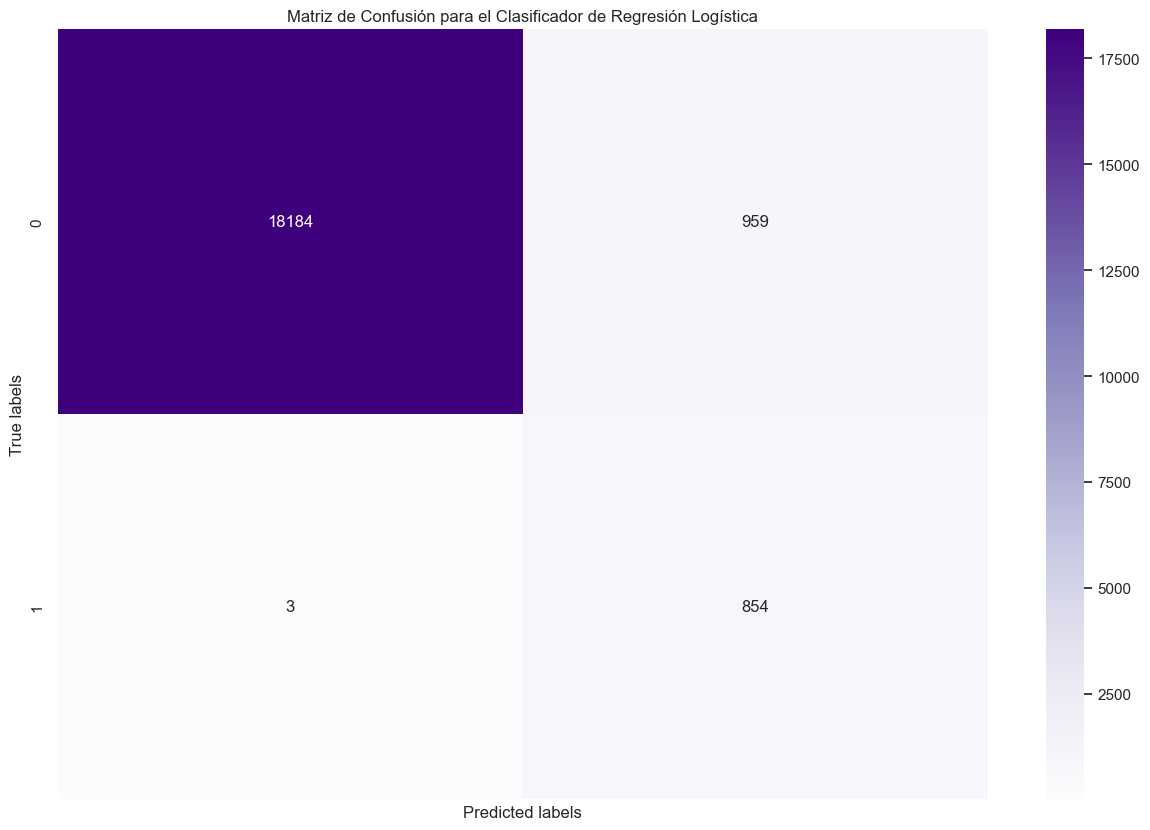

Precisión: (11644    0
3690     0
6230     0
73070    0
73021    0
        ..
60654    0
62556    0
13783    0
17702    0
52600    0
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int32, array([0, 0, 0, ..., 0, 1, 0]))
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     19143
           1       0.47      1.00      0.64       857

    accuracy                           0.95     20000
   macro avg       0.74      0.97      0.81     20000
weighted avg       0.98      0.95      0.96     20000



In [23]:
y_prob = model.predict_proba(x_test)[:,1]
y_pred = (y_pred_proba > 0.6).astype(int)
cm_1 = confusion_matrix(y_test, y_pred)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Purples", xticklabels=0, yticklabels=1)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador de Regresión Logística')
plt.show()
accuracy = (y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Precisión: {accuracy}")
print("Informe de clasificación:")
print(report)

Logramos mejorar los resultados por un 1% teniendo 959 falsos positivos pero ahora tenemos 3 falsos negativos

In [ ]:
#Creamos una lista nueva que contendrá las columnas que quitaremos para un 3er último entrenamiento
quitar = ["Age","Family History_Yes","Personal History_Yes","Coping Mechanisms_Meditation","Coping Mechanisms_Seeking therapy",
         "Coping Mechanisms_Socializing","Social Support_Low"]
X_new = X.drop(quitar,axis=1)
X_new

,Gender_Female,Gender_Male,Family History_No,Personal History_No,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,Symptoms_Dizziness,Symptoms_Fear of losing control,...,Psychiatric History_Bipolar disorder,Psychiatric History_Depressive disorder,Substance Use_Alcohol,Substance Use_Drugs,Coping Mechanisms_Exercise,Social Support_High,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
2,1,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,0,1,1,0,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,1,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
99996,1,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
99997,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
99998,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


## último entrenamiento

In [ ]:
#Hacemos una nueva fragmentación
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(X_new,Y,random_state = 42, stratify=Y, test_size  = 0.2)

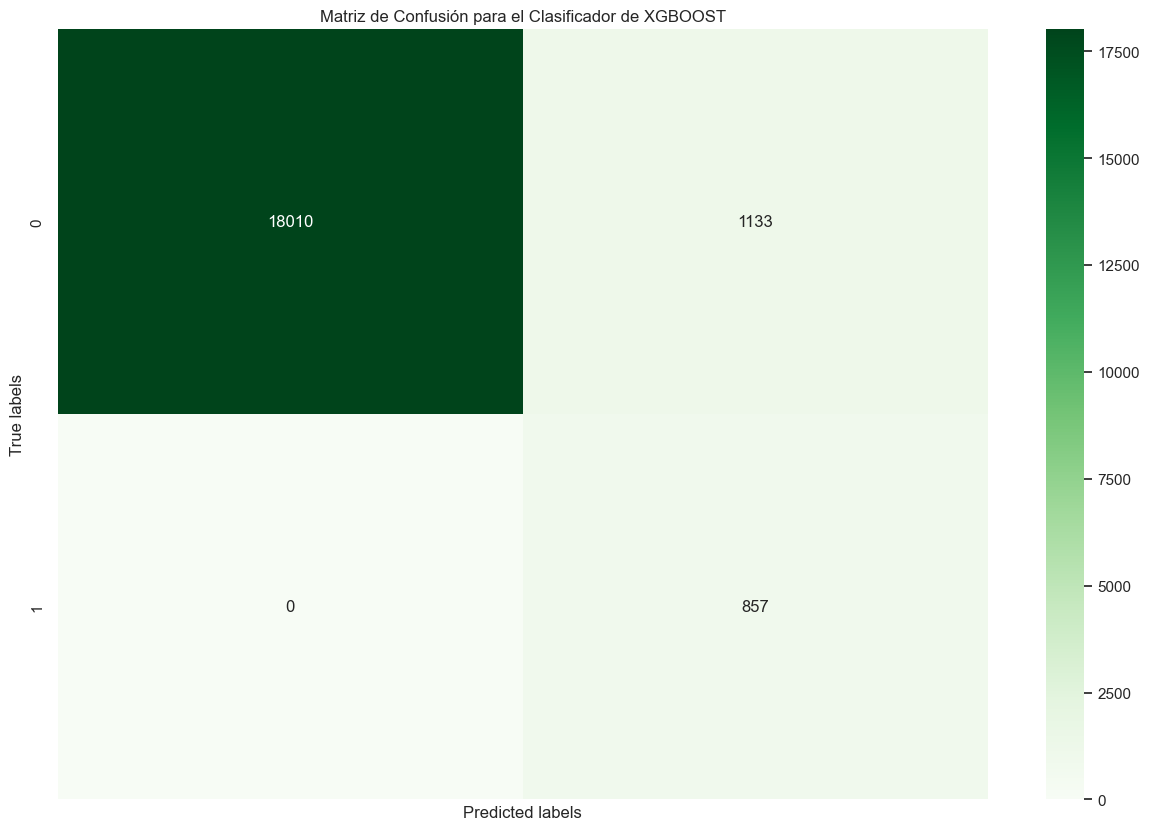

Precisión: (11644    0
3690     0
6230     0
73070    0
73021    0
        ..
60654    0
62556    0
13783    0
17702    0
52600    0
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int32, array([0, 0, 0, ..., 0, 1, 0]))
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19143
           1       0.43      1.00      0.60       857

    accuracy                           0.94     20000
   macro avg       0.72      0.97      0.79     20000
weighted avg       0.98      0.94      0.95     20000



In [26]:
model_2 = LogisticRegression(class_weight="balanced", solver="liblinear")

# Train the model
model_2.fit(x_train_new, y_train_new)

# Predictions
y_pred_new = model_2.predict(x_test_new)
cm_new = confusion_matrix(y_test_new, y_pred_new)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_new, annot=True, fmt="d", cmap="Greens", xticklabels=0, yticklabels=1)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador de XGBOOST')
plt.show()
accuracy = (y_test_new, y_pred_new)
report = classification_report(y_test_new, y_pred_new)
print(f"Precisión: {accuracy}")
print("Informe de clasificación:")
print(report)

Este último entrenamiento nos quito los falsos negativos pero nos volvio a aumentar los falsos positivos, con lo cual podemos concluir que la regresión logística no es un modelo apto para este problema, pues la complejidad y la magnitud de datos a pesar que nos da un acurracy arriba del 0.90 sigue siendo malo frente al modelo de XGBOOST que no solo nos dio un pantaje alto global, sino también por separado.